In [0]:
from google.colab import files
uploaded=files.upload()

Saving Data_Test.xlsx to Data_Test.xlsx


In [0]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline

df = pd.read_excel('Data_Train.xlsx')
print(df.head(10))
df = df[pd.notnull(df['SECTION'])]
print(df['STORY'].apply(lambda x: len(x.split(' '))).sum())


                                               STORY  SECTION
0  But the most painful was the huge reversal in ...        3
1  How formidable is the opposition alliance amon...        0
2  Most Asian currencies were trading lower today...        3
3  If you want to answer any question, click on ‘...        1
4  In global markets, gold prices edged up today ...        3
5  BEIJING: Chinese tech giant Huawei has announc...        1
6  Mumbai: India Inc's external commercial borrow...        3
7  On Wednesday, Federal Reserve Chairman Jerome ...        3
8  What more can you give to the audience? I have...        2
9  com, Arbaaz Khan spoke about getting back to D...        2
808524


In [0]:
df1 = pd.read_excel('Data_Test.xlsx')
print(df1.head(10))
print(df1['STORY'].apply(lambda x: len(x.split(' '))).sum())


                                               STORY
0  2019 will see gadgets like gaming smartphones ...
1  It has also unleashed a wave of changes in the...
2  It can be confusing to pick the right smartpho...
3  The mobile application is integrated with a da...
4  We have rounded up some of the gadgets that sh...
5  "Imagine if every message you sent was kept wi...
6  Positioned along the four sides of the Asus RO...
7  In fact, when I applied to USC film school the...
8  As spotted by Android Police, Netflix is testi...
9  Her moves were immaculately choreographed as s...
285579


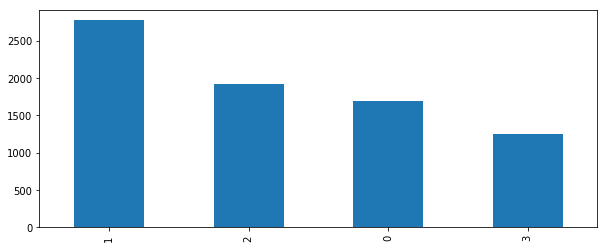

In [0]:
my_section = [0,1,2,3]
plt.figure(figsize=(10,4))
df.SECTION.value_counts().plot(kind='bar');

In [0]:
def print_plot(index):
    example = df[df.index == index][['STORY', 'SECTION']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Tag:', example[1])
print_plot(10)


“One would think that their development and testing process would’ve uncovered many of these flaws, and yet they proceeded to put it in the market anyway," said Bryan Ma, vice president of devices research at consultancy IDC. “Clearly they can’t afford to have another embarrassing Note 7-like incident, lest they build up a reputation for releasing unreliable products."


The Note 7 episode triggered a global recall, cost the company billions of dollars and marred its reputation as it battled Apple Inc. in premium devices. Pulling the Fold now lets the Korean giant address potential issues as it races to put out a flexible gadget ahead of Chinese rival Huawei Technologies Co. and Xiaomi Corp.


A Samsung spokeswoman declined to comment for this story. Shares in the company, which hasn’t set another date for a commercial launch, were little changed in Seoul on Wednesday.


Samsung has bounced back since the Note 7 — it remains the world’s largest producer of smartphones and memory chips.

In [0]:
import nltk
nltk.download('stopwords')
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text) 
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text
    
df['STORY'] = df['STORY'].apply(clean_text)
print_plot(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
one would think development testing process wouldve uncovered many flaws yet proceeded put market anyway said bryan vice president devices research consultancy idc clearly cant afford another embarrassing note 7like incident lest build reputation releasing unreliable productsthe note 7 episode triggered global recall cost company billions dollars marred reputation battled apple inc premium devices pulling fold lets korean giant address potential issues races put flexible gadget ahead chinese rival huawei technologies co xiaomi corpa samsung spokeswoman declined comment story shares company hasnt set another date commercial launch little changed seoul wednesdaysamsung bounced back since note 7 remains worlds largest producer smartphones memory chips counting folding devices extend lead mobile kickstart stagnating global marketunveiled along 10thanniversary version flags

In [0]:
import nltk
nltk.download('stopwords')
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text) 
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text
    
df1['STORY'] = df1['STORY'].apply(clean_text)
print_plot(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
“One would think that their development and testing process would’ve uncovered many of these flaws, and yet they proceeded to put it in the market anyway," said Bryan Ma, vice president of devices research at consultancy IDC. “Clearly they can’t afford to have another embarrassing Note 7-like incident, lest they build up a reputation for releasing unreliable products."


The Note 7 episode triggered a global recall, cost the company billions of dollars and marred its reputation as it battled Apple Inc. in premium devices. Pulling the Fold now lets the Korean giant address potential issues as it races to put out a flexible gadget ahead of Chinese rival Huawei Technologies Co. and Xiaomi Corp.


A Samsung spokeswoman declined to comment for this story. Shares in the company, which hasn’t set another date for a commercial launch, were little changed in Seoul on Wednesday.

In [0]:
 import nltk
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# tokenization
tokenized_doc = df['STORY'].apply(lambda x: x.split())

# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization
detokenized_doc = []
for i in range(len(df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

df['STORY'] = detokenized_doc

In [0]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# tokenization
tokenized_doc1 = df1['STORY'].apply(lambda x: x.split())

# remove stop-words
tokenized_doc1 = tokenized_doc1.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization
detokenized_doc1 = []
for i in range(len(df1)):
    t = ' '.join(tokenized_doc1[i])
    detokenized_doc1.append(t)

df1['STORY'] = detokenized_doc1

In [0]:
detokenized_doc1

['2019 see gadgets like gaming smartphones wearable medical devices lifting user experience whole new levelmintindiawire consumer technologyconsumer technology trends new yeartech gadgetsfoldable phonesgaming smartphoneswearable medical devicestechnologynew delhi gadgets become integral part lives us relying form factor communicate commute work informed entertained year 2019 see gadgets lifting user experience whole new level heres expect seesmartphones foldable screens foldable phones finally moving concept stage commercial launches made organic lightemitting diode oled panels higher plastic substrates allowing bent without damageusbased display maker royole corps foldable phone flexpai already arrived select markets samsungs unnamed foldable phone expected sometime next year samsungs smartphone chief executive officer dj koh said make million units lg expected display foldable phone next year meanwhile apple nokia lenovo huawei also working foldable phones reportedlyesim soon smartph

In [0]:
df.head()

,STORY,SECTION
0,painful huge reversal fee income unheard among...,3
1,formidable opposition alliance among congress ...,0
2,asian currencies trading lower today south kor...,3
3,want answer question click answer clicking ans...,1
4,global markets gold prices edged today disappo...,3


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 7628, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(df['STORY'])

X.shape 
print(X)

  (0, 3785)	0.10957499484343418
  (0, 3122)	0.07698961320810079
  (0, 3333)	0.10899901540793339
  (0, 5897)	0.14515021767289238
  (0, 1555)	0.07438603723396899
  (0, 6152)	0.12932005783508665
  (0, 915)	0.1092848233019124
  (0, 6445)	0.11109627588290427
  (0, 6568)	0.08648886380757059
  (0, 5294)	0.22156424434381045
  (0, 4831)	0.1362173913051249
  (0, 2963)	0.1051593242307529
  (0, 3411)	0.10470132937550145
  (0, 1471)	0.11418508900762174
  (0, 4094)	0.09499264561782275
  (0, 3638)	0.16363756527792836
  (0, 1691)	0.1134540039983423
  (0, 4602)	0.08531113251064563
  (0, 3069)	0.08044426577889306
  (0, 2953)	0.08830899684853932
  (0, 6685)	0.14939125428398348
  (0, 7425)	0.10586769939530746
  (0, 4896)	0.08250998123950376
  (0, 1110)	0.14515021767289238
  (0, 5153)	0.12698989443338385
  :	:
  (7626, 3164)	0.07040449330351088
  (7626, 5628)	0.06371542734722169
  (7626, 4446)	0.0628187547822892
  (7626, 3078)	0.04679676521453701
  (7626, 2011)	0.05032191957568944
  (7626, 1970)	0.06626376

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 7628, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)

L = vectorizer.fit_transform(df1['STORY'])

L.shape 

(2748, 7628)

In [0]:
from sklearn.decomposition import TruncatedSVD


svd_model = TruncatedSVD(n_components=50, algorithm='randomized', n_iter=100, random_state=122)

M=svd_model.fit_transform(X)

len(svd_model.components_)

1200

In [0]:
svd_model.explained_variance_.sum()

0.6429340989617212

In [0]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
        print(" ")

Topic 0: 
said
 
congress
 
bjp
 
party
 
india
 
seats
 
elections
 
Topic 1: 
congress
 
bjp
 
party
 
seats
 
lok
 
sabha
 
elections
 
Topic 2: 
modifications
 
headline
 
wire
 
text
 
feed
 
agency
 
published
 
Topic 3: 
pro
 
redmi
 
smartphone
 
note
 
camera
 
display
 
ram
 
Topic 4: 
dollar
 
rupee
 
trading
 
note
 
redmi
 
close
 
pro
 
Topic 5: 
film
 
actor
 
avengers
 
endgame
 
films
 
movie
 
marvel
 
Topic 6: 
dollar
 
currencies
 
trading
 
close
 
users
 
currencys
 
whatsapp
 
Topic 7: 
note
 
redmi
 
facebook
 
pro
 
modi
 
said
 
social
 
Topic 8: 
sabha
 
lok
 
seats
 
phase
 
elections
 
whatsapp
 
polling
 
Topic 9: 
apple
 
note
 
iphone
 
pro
 
redmi
 
xs
 
ipad
 
Topic 10: 
modi
 
election
 
phase
 
commission
 
polling
 
narendra
 
elections
 
Topic 11: 
whatsapp
 
modi
 
film
 
feature
 
iphone
 
bond
 
minister
 
Topic 12: 
galaxy
 
samsung
 
note
 
facebook
 
smartphone
 
redmi
 
million
 
Topic 13: 
crore
 
sale
 
oneplus
 
congress
 
000
 
shares
 


In [0]:
m

array([[ 0.07169308, -0.03613578, -0.0057799 , ..., -0.00076287,
        -0.00691777, -0.00197909]])

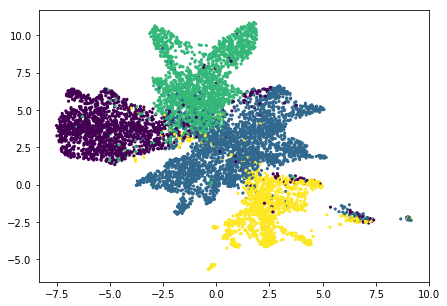

In [0]:
import umap

X_topics = svd_model.fit_transform(X)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics)

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = df.SECTION,
s = 10, # size
edgecolor='none'
)
plt.show()

In [0]:
from sklearn.manifold import TSNE
tsne=TSNE(n_iter=2000)
d3=tsne.fit_transform(X_topics)


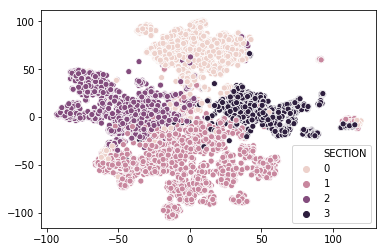

In [0]:
import seaborn as sns
sns.scatterplot(d3[:,0],d3[:,1],hue=df.SECTION)

In [0]:
K = X
y = df.SECTION
X_train, X_test, y_train, y_test = train_test_split(K, y, test_size=0.3, random_state = 42)


In [0]:
y_train.dtypes

dtype('int64')

In [0]:
M

array([[ 0.07169308, -0.03613578, -0.0057799 , ...,  0.03140899,
         0.01703534, -0.01444498],
       [ 0.05640376,  0.06740876,  0.00037087, ..., -0.00782182,
        -0.00767955,  0.00258864],
       [ 0.06582996, -0.06740633, -0.00109517, ..., -0.00795139,
        -0.02175432,  0.08633018],
       ...,
       [ 0.08118182, -0.02641851,  0.02739426, ..., -0.00413144,
        -0.02257875, -0.01626491],
       [ 0.27114192,  0.21169527, -0.00214306, ..., -0.00798185,
         0.02332314, -0.01254111],
       [ 0.01054363,  0.00131605, -0.00115976, ..., -0.00076287,
        -0.00691777, -0.00197909]])

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])


parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    # 'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    # 'tfidf__use_idf': (True, False),
    # 'tfidf__norm': ('l1', 'l2'),
    'clf__max_iter': (20,),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
    # 'clf__max_iter': (10, 50, 80),
}

if __name__ == "__main__":
   
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    print(parameters)
    grid_search.fit(df.STORY, df.SECTION)
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'vect__max_df': (0.5, 0.75, 1.0), 'vect__ngram_range': ((1, 1), (1, 2)), 'clf__max_iter': (20,), 'clf__alpha': (1e-05, 1e-06), 'clf__penalty': ('l2', 'elasticnet')}
Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  2.1min finished



Best score: 0.977
Best parameters set:
	clf__alpha: 1e-05
	clf__max_iter: 20
	clf__penalty: 'l2'
	vect__max_df: 0.5
	vect__ngram_range: (1, 2)


In [0]:
`         from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
clf=LogisticRegression(solver='lbfgs')

# logreg = Pipeline([('vect', CountVectorizer(lowercase = False)),
#                  ('tfidf', TfidfTransformer()),
#                  ('clf', LogisticRegression(solver='lbfgs')),
#                   ])
# parameters={
#   'clf__alpha': 1e-05,
#  	'clf__max_iter': 20,
#  	'clf__penalty': 'l2',
#  	'vect__max_df': 0.5
#  }

clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy 0.963739624290083
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       491
           1       0.97      0.97      0.97       846
           2       0.95      0.98      0.97       598
           3       0.96      0.96      0.96       354

    accuracy                           0.96      2289
   macro avg       0.96      0.96      0.96      2289
weighted avg       0.96      0.96      0.96      2289



In [0]:
L.shape

(2748, 7628)

In [0]:
df['SECTION'].shape

(7628,)

In [0]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [0]:
model =XGBClassifier(base_score=0.25, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.85, gamma=0,
              learning_rate=1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.25, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.85, gamma=0,
              learning_rate=1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred = model.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

TypeError: ignored

In [0]:

params = {
        'n_estimators': [200,300,400,500],
        'criterion':['gini','entropy'],
        'max_depth': [15, 20, 25],
        }
grid=GridSearchCV(rm,param_grid=params,cv=2,n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy', max_depth=25,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=500, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='

In [0]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score



In [0]:
svc=LinearSVC(multi_class='ovr',dual=True,max_iter=2000,tol=1e-05)
svc.fit(X,y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=2000,
          multi_class='ovr', penalty='l2', random_state=None, tol=1e-05,
          verbose=0)

In [0]:
y_pred = svc.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.9733508082131935
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       491
           1       0.99      0.97      0.98       846
           2       0.96      0.99      0.97       598
           3       0.96      0.98      0.97       354

    accuracy                           0.97      2289
   macro avg       0.97      0.97      0.97      2289
weighted avg       0.97      0.97      0.97      2289



In [0]:
y_pred1 = svc.predict(L)
y_pred1
df3=pd.DataFrame(y_pred1)


In [0]:
df3.to_excel("df1.xlsx")

In [0]:
    rm=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rm.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
M.shape

(7628, 30)

In [0]:
y_pred = rm.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.9467016164263871
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       491
           1       0.95      0.95      0.95       846
           2       0.94      0.96      0.95       598
           3       0.94      0.93      0.94       354

    accuracy                           0.95      2289
   macro avg       0.95      0.94      0.94      2289
weighted avg       0.95      0.95      0.95      2289



In [0]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model1 = GaussianNB()

# Train the model using the training sets
model1.fit(M,y)


GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred = model1.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.8453473132372215
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       491
           1       0.94      0.76      0.84       846
           2       0.70      0.94      0.81       598
           3       0.87      0.86      0.86       354

    accuracy                           0.85      2289
   macro avg       0.86      0.86      0.85      2289
weighted avg       0.87      0.85      0.85      2289

